<h2> Example 5 - Numerical Illustration of the Central Limit Theorem </h2>

In this example we will draw several sample sets of a random variable, calculate the standardized sample mean, and show that the distribution of standardized sample means approximates a standard normal distribution.

In [1]:
using Distributions
using PyPlot

For this exercise, I'll sample from a discrete probability distribution, to highlight that even in this case our limiting distribution will be the continuous $\text{N}(0,1)$.  Specifically, I'll use a Poisson distribution, which specifies the probability of $k$ independent arrivals occuring in a unit interval, if arrivals happen at mean rate of $\lambda$ per unit time.

In [2]:
d = Poisson(5);
N = 1000;
M = 10000;
x = rand(d,N,M)

1000×10000 Array{Int64,2}:
 6  5  10   1  7   7   1   4   3   6  …  7   6   7   3  4  2  6  4   8   4
 4  6   5   4  4  10   2   6   5   8     2   9   7   2  4  5  7  4   5   4
 4  3   5   6  5   2   7   6  12   5     3   7   9  10  7  4  3  5   8   3
 3  4   4   5  6   2   3   2   5   5     4   5   5   4  4  4  4  7   3   3
 4  7   4   8  5   9  10   7   5   4     3   5   4   6  4  7  3  4  10   8
 3  6   7   4  4   7   7   9   7   4  …  5   5   3   6  7  9  5  4   3   8
 2  2   5  10  9  11   6   6   2   5     8   4   9   4  4  2  2  6  10   2
 9  7   3   6  2   3   7   7   7   4     3   4   6   8  5  5  4  2   5   5
 4  6   6   7  1   3   6  12   7   6     6   4   3   4  8  6  8  7   5   4
 4  5  10   3  9   3   3   6   7   1     5   4   4   3  2  5  7  5   7   5
 9  9   5   6  4   4   4   3   1   3  …  2   5   2   3  9  5  5  7   4   5
 5  9   4   5  9   6   4   7   4   6     6   1   3   5  6  5  7  5   5   8
 3  2   3   3  4   6   4  11   5   2     8   3   4   2  5  5  5  4  11   

To standardize the sample mean, it is enough to substract the population mean and divide by the population standard deviation in each term, and multiply by $\sqrt{N}$ (so the normalization factor is $1/\sqrt{N}$).

In [3]:
xAveStandardized = (1.0/sqrt(N))*[sum((x[:,iSamp].-mean(d))./sqrt(var(d))) for iSamp=1:M]

10000-element Array{Float64,1}:
 -1.131370849898476  
 -0.07071067811865477
 -0.6505382386916239 
  0.4525483399593902 
 -0.7212489168102781 
 -0.3676955262170048 
 -1.6263455967290597 
  1.0748023074035524 
  0.39597979746446677
 -1.34350288425444   
  0.4666904755831215 
  1.0182337649086284 
 -1.4142135623730947 
  ⋮                  
 -1.0182337649086286 
  0.39597979746446665
  2.1496046148071044 
  0.33941125496954244
 -2.064751801064719  
 -0.1272792206135788 
  0.11313708498984763
  2.3900209204105307 
  0.0989949493661165 
  0.282842712474619  
 -1.0606601717798212 
  0.7353910524340093 

We can now plot a histogram of the above vector and visually verify that it appears to have the shape of a standard normal distribution.

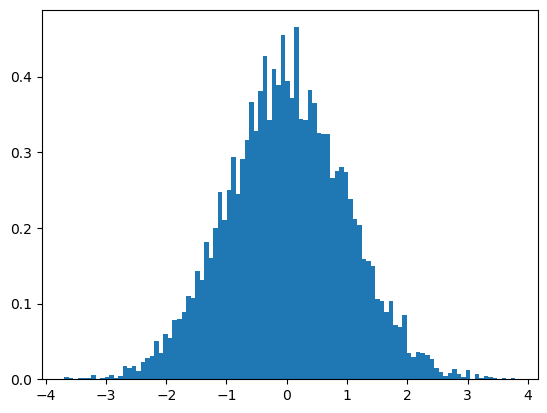

In [4]:
plt.hist(xAveStandardized,100,density=true);

A more rigorous verification is to actually fit a normal distribution to the data vector.  We can plot the PDF of the fitted distribution along with the data.

In [5]:
fitNormal = fit(typeof(Normal()),xStandardized);
println("Mean: ", mean(fitNormal));
println("Variance: ", var(fitNormal));

plt.hist(xAveStandardized,100,density=truelabel="Sample");
gx = range(-4,4,length=1000);
gPDF = pdf.(fitNormal,gx);
plot(gx,gPDF,color="orange",label="Normal Fit");

UndefVarError: [91mUndefVarError: xStandardized not defined[39m

Finally, we can recompute the sample mean with the scaling $1/N$ instead of $1/\sqrt{N}$.  Consistent with the law of large numbers, this gives a distribution which is much tighter around the population mean.

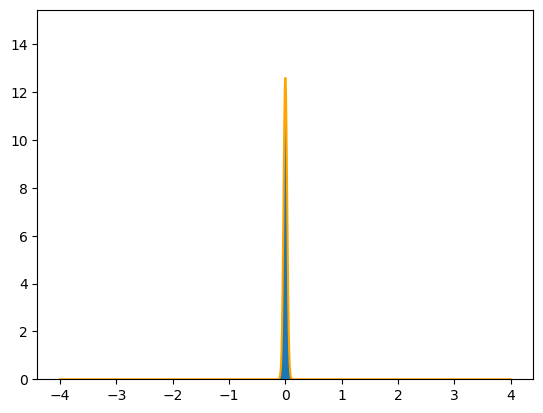

Mean: 5.277120426896262e-6
Variance: 0.0009887057321519984


In [7]:
xAveStandardizedRescaled = (1.0/sqrt(N))*xAveStandardized;
fitNormal = fit(typeof(Normal()),xAveStandardizedRescaled);
println("Mean: ", mean(fitNormal));
println("Variance: ", var(fitNormal));

plt.hist(xAveStandardizedRescaled,100,density=truelabel="Sample");
gx = range(-4,4,length=1000);
gPDF = pdf.(fitNormal,gx);
plot(gx,gPDF,color="orange",label="Normal Fit");